In [44]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans

import seaborn as sns

from sklearn.random_projection import GaussianRandomProjection

from sklearn.metrics import rand_score, accuracy_score, adjusted_rand_score
from scipy.optimize import linear_sum_assignment

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [45]:
df = pd.read_csv("seeds.tsv", delimiter="\t", header=None)
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [46]:
column_names_without_label = [
    "area",
    "perimeter",
    "compactness",
    "length_kernel",
    "width_kernel",
    "asymmetry_coeff",
    "kernel_groove",
]
label_column_name = "class_label"

# seperated the class label to use only the feature names in the assignment problems
column_names = list(column_names_without_label)
column_names.append(label_column_name)
df.columns = column_names
df.head()

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,kernel_groove,class_label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [47]:
# get max and min values in all the columns
df.agg(["max", "min"], axis=0)

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,kernel_groove,class_label
max,21.18,17.25,0.9183,6.675,4.033,8.4560,6.550,3
min,10.59,12.41,0.8081,4.899,2.630,0.7651,4.519,1


In [48]:
features = df.drop(label_column_name, axis=1)
labels = df[label_column_name]

In [49]:
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

In [50]:
# add column namese to the feature normalized columns
normalized_data = pd.DataFrame(normalized_features, columns=features.columns)
# combine the labels columns
normalized_data[label_column_name] = labels.values

normalized_data.head()

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,kernel_groove,class_label
0,0.440982,0.502066,0.570780,0.486486,0.486101,0.189302,0.345150,1
1,0.405099,0.446281,0.662432,0.368806,0.501069,0.032883,0.215165,1
2,0.349386,0.347107,0.879310,0.220721,0.503920,0.251453,0.150665,1
3,0.306893,0.316116,0.793103,0.239302,0.533856,0.194243,0.140817,1
4,0.524079,0.533058,0.864791,0.427365,0.664291,0.076701,0.322994,1


In [51]:
# this table show the mapping of 0.0 to min value and 1.0 to max value after normalization
pd.DataFrame(
    {
        "Feature": features.columns,
        "Min Value (0.0)": scaler.data_min_,
        "Max Value (1.0)": scaler.data_max_,
    }
)

,Feature,Min Value (0.0),Max Value (1.0)
0,area,10.5900,21.1800
1,perimeter,12.4100,17.2500
2,compactness,0.8081,0.9183
3,length_kernel,4.8990,6.6750
4,width_kernel,2.6300,4.0330
5,asymmetry_coeff,0.7651,8.4560
6,kernel_groove,4.5190,6.5500


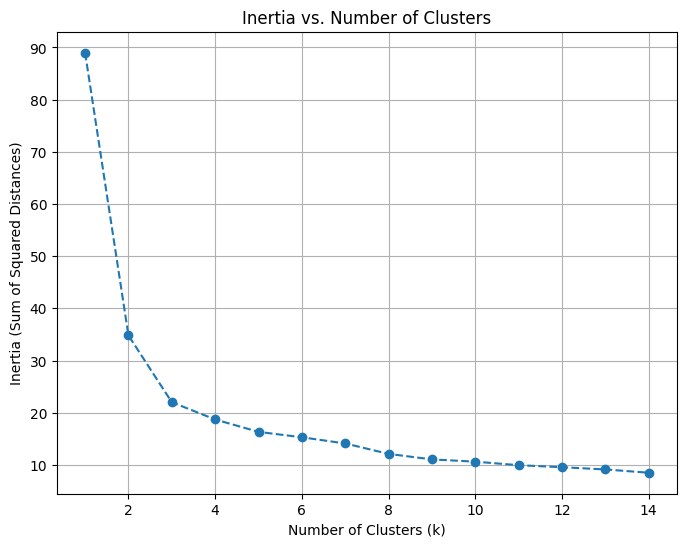

In [52]:
# Problem 2
inertias = []
k_values = range(1, 15)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_features)
    inertias.append(kmeans.inertia_)

# plot the inertia as a function of k
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Inertia vs. Number of Clusters")
plt.grid(True)

plt.savefig("prob2.svg")
plt.show()

From the observation we see the optimal cluster size would be 4.

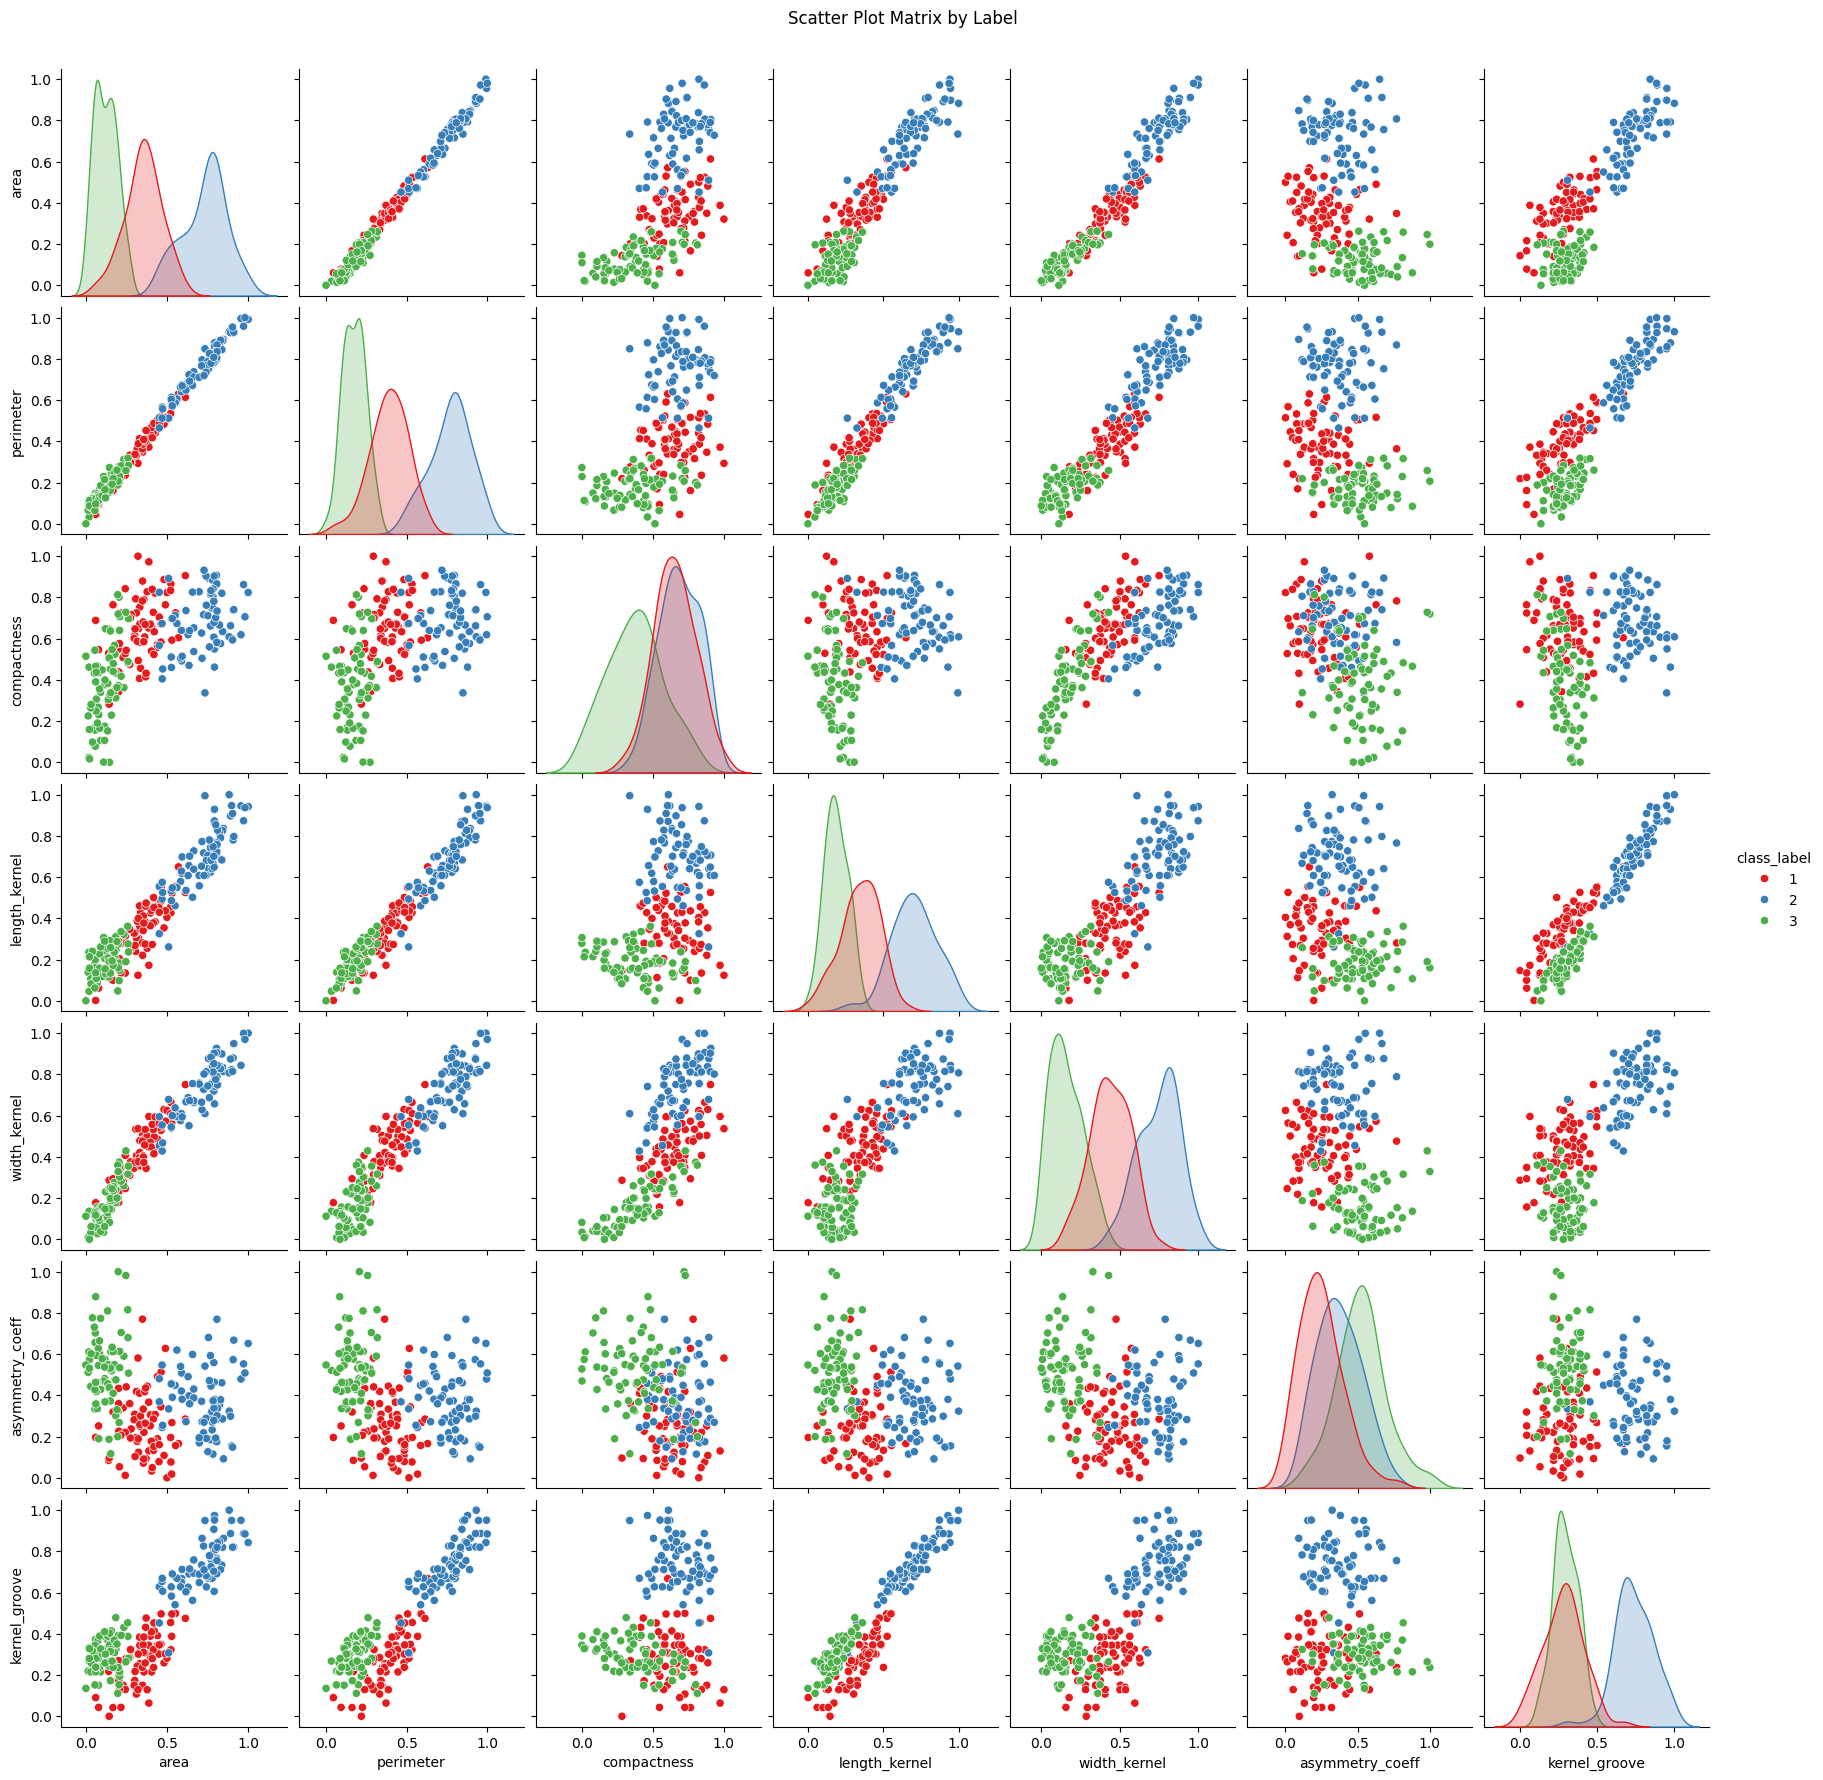

In [ ]:
# prob 3a
# Create a pairplot
pairplot = sns.pairplot(
    normalized_data,
    vars=column_names_without_label,
    hue=label_column_name,
    palette="Set1",
)

# Customize and show the plot
pairplot.figure.suptitle("Scatter Plot Matrix by Label", y=1.02)
plt.show()

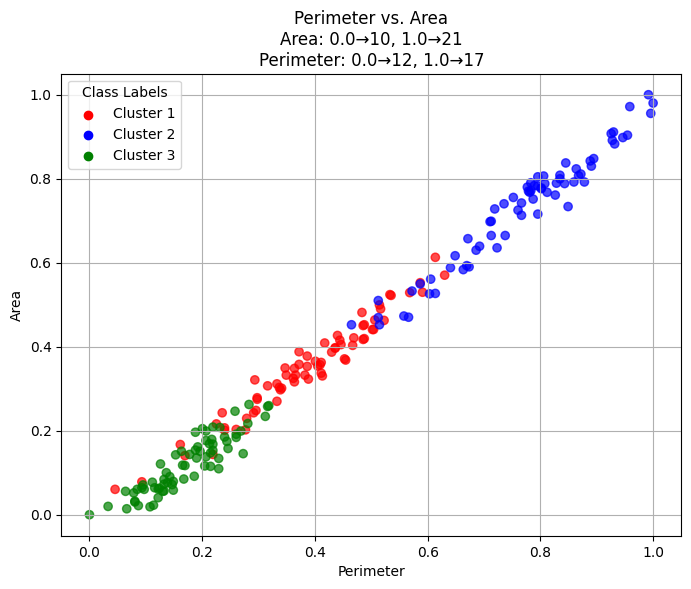

In [53]:
plt.figure(figsize=(8, 6))

class_colors = ["red", "blue", "green"]
plt.scatter(
    normalized_data["perimeter"],
    normalized_data["area"],
    c=normalized_data["class_label"],
    alpha=0.7,
    cmap=plt.cm.colors.ListedColormap(class_colors),
)

plt.xlabel("Perimeter")
plt.ylabel("Area")
plt.title("Perimeter vs. Area\nArea: 0.0→10, 1.0→21\nPerimeter: 0.0→12, 1.0→17")
plt.grid(True)

plt.scatter([], [], c="red", label="Cluster 1")
plt.scatter([], [], c="blue", label="Cluster 2")
plt.scatter([], [], c="green", label="Cluster 3")
plt.legend(
    title="Class Labels",
)

plt.savefig("prob3a.svg")
plt.show()

In [54]:
normalized_data.drop("class_label", axis=1)

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,kernel_groove
0,0.440982,0.502066,0.570780,0.486486,0.486101,0.189302,0.345150
1,0.405099,0.446281,0.662432,0.368806,0.501069,0.032883,0.215165
2,0.349386,0.347107,0.879310,0.220721,0.503920,0.251453,0.150665
3,0.306893,0.316116,0.793103,0.239302,0.533856,0.194243,0.140817
4,0.524079,0.533058,0.864791,0.427365,0.664291,0.076701,0.322994
...,...,...,...,...,...,...,...
205,0.151086,0.163223,0.637024,0.134009,0.250178,0.372635,0.172821
206,0.060434,0.097107,0.390200,0.135698,0.117605,0.462872,0.238306
207,0.246459,0.258264,0.727768,0.189752,0.429081,0.981667,0.264402
208,0.118036,0.165289,0.399274,0.155405,0.146828,0.368344,0.258493


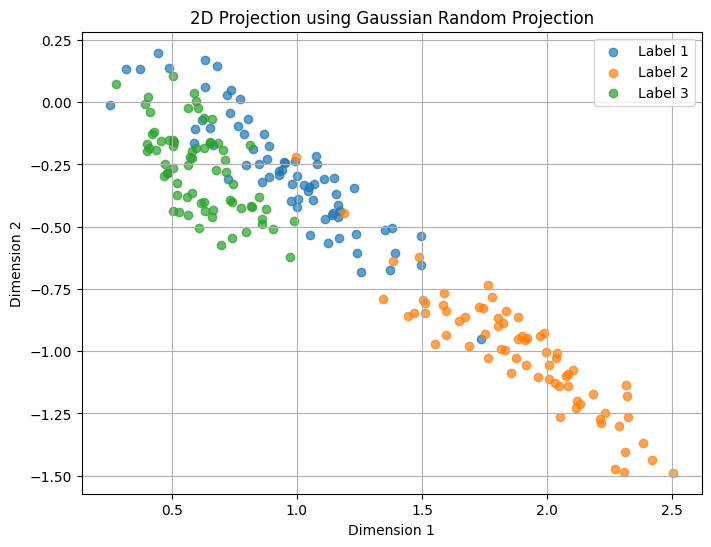

In [55]:
# problem 3b
# Apply Gaussian Random Projection
grp = GaussianRandomProjection(n_components=2, random_state=42)
projected_data = grp.fit_transform(normalized_features)

projected_df = pd.DataFrame(projected_data, columns=["dimension 1", "dimension 2"])
projected_df["label"] = labels

plt.figure(figsize=(8, 6))
for label in projected_df["label"].unique():
    subset = projected_df[projected_df["label"] == label]
    plt.scatter(
        subset["dimension 1"], subset["dimension 2"], label=f"Label {label}", alpha=0.7
    )

plt.title("2D Projection using Gaussian Random Projection")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.grid(True)
plt.savefig("prob3b.svg")
plt.show()

In [56]:
import pandas as pd
import umap.umap_ as umap
import matplotlib.pyplot as plt


# Apply UMAP for dimensionality reduction to 2D
reducer = umap.UMAP(n_components=2, random_state=42)
projected_data = reducer.fit_transform(normalized_features)

# Convert the projected data to a DataFrame for visualization
projected_df = pd.DataFrame(projected_data, columns=["Dim1", "Dim2"])
projected_df["label"] = labels

# Plot the projected data
plt.figure(figsize=(8, 6))
for label in projected_df["label"].unique():
    subset = projected_df[projected_df["label"] == label]
    plt.scatter(subset["Dim1"], subset["Dim2"], label=f"Label {label}", alpha=0.7)

plt.title("2D Projection using UMAP")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.grid(True)
plt.show()

ModuleNotFoundError: No module named 'numba'

In [57]:
num_classes = labels.nunique()
true_labels = labels

In [58]:
# problem 4
kmeans = KMeans(n_clusters=num_classes)
predicted_clusters = kmeans.fit_predict(normalized_features)

rand_index = rand_score(true_labels, predicted_clusters)
print(f"Rand Index: {rand_index}")

confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)
for true, pred in zip(true_labels, predicted_clusters):
    confusion_matrix[true - 1, pred] += 1  # Adjust true_labels to be zero-based

row_ind, col_ind = linear_sum_assignment(confusion_matrix.max() - confusion_matrix)
accuracy = confusion_matrix[row_ind, col_ind].sum() / len(labels)
print(f"Clustering Accuracy: {accuracy:.2f}")

Rand Index: 0.8641604010025062
Clustering Accuracy: 0.89


Linkage: ward, Accuracy: 0.40476190476190477


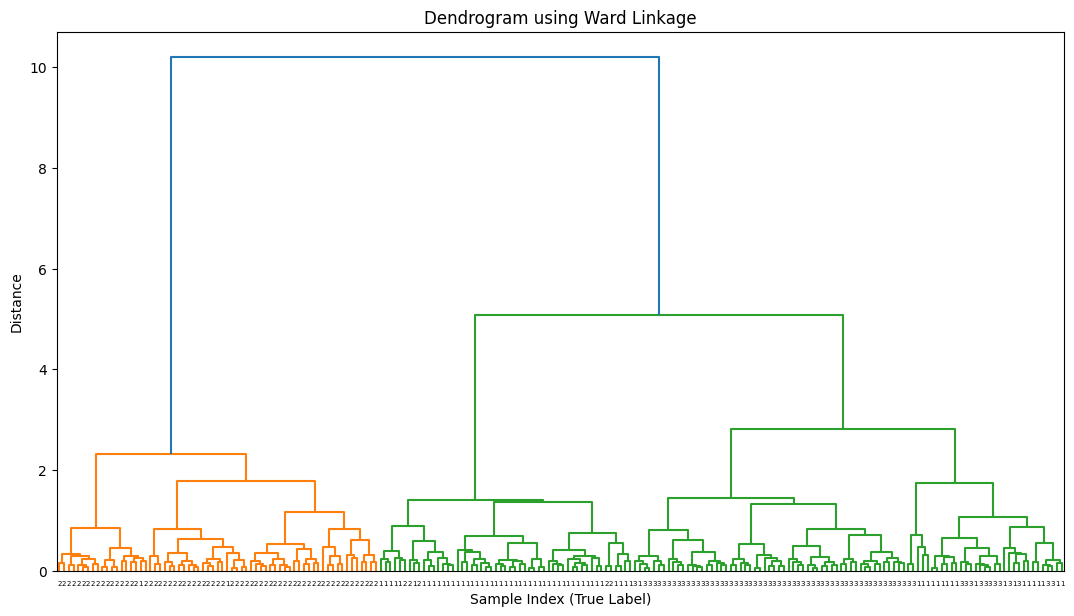

In [59]:
# Try different linkage options
# 1.ward
linkage_option = "ward"
model = AgglomerativeClustering(
    n_clusters=true_labels.nunique(), linkage=linkage_option
)
# predicted_clusters = model.fit_predict(normalized_features)
predicted_clusters = model.fit_predict(normalized_features)
accuracy = accuracy_score(
    true_labels, np.choose(predicted_clusters, np.unique(true_labels))
)
print(f"Linkage: {linkage_option}, Accuracy: {accuracy}")


Z = linkage(normalized_features, method=linkage_option)

plt.figure(figsize=(13, 7))
dendrogram(Z, labels=true_labels.to_numpy(), leaf_rotation=0)
plt.title(f"Dendrogram using {linkage_option.capitalize()} Linkage")
plt.xlabel("Sample Index (True Label)")
plt.ylabel("Distance")
plt.show()

Linkage: complete, Accuracy: 0.8428571428571429


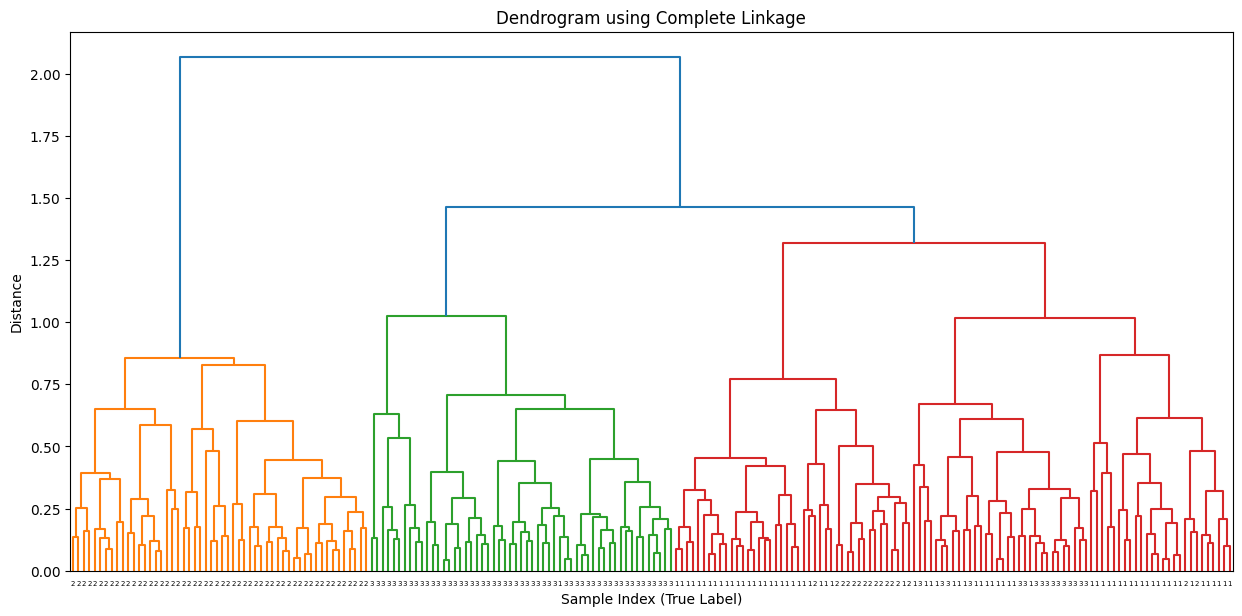

In [60]:
# Try different linkage options
# 2.complete
linkage_option = "complete"
model = AgglomerativeClustering(
    n_clusters=true_labels.nunique(), linkage=linkage_option
)
predicted_clusters = model.fit_predict(normalized_features)
accuracy = accuracy_score(
    true_labels, np.choose(predicted_clusters, np.unique(true_labels))
)
print(f"Linkage: {linkage_option}, Accuracy: {accuracy}")

Z = linkage(normalized_features, method=linkage_option)

plt.figure(figsize=(15, 7))
dendrogram(Z, labels=true_labels.to_numpy(), leaf_rotation=0)
plt.title(f"Dendrogram using {linkage_option.capitalize()} Linkage")
plt.xlabel("Sample Index (True Label)")
plt.ylabel("Distance")
plt.show()

Linkage: average, Accuracy: 0.8952380952380953


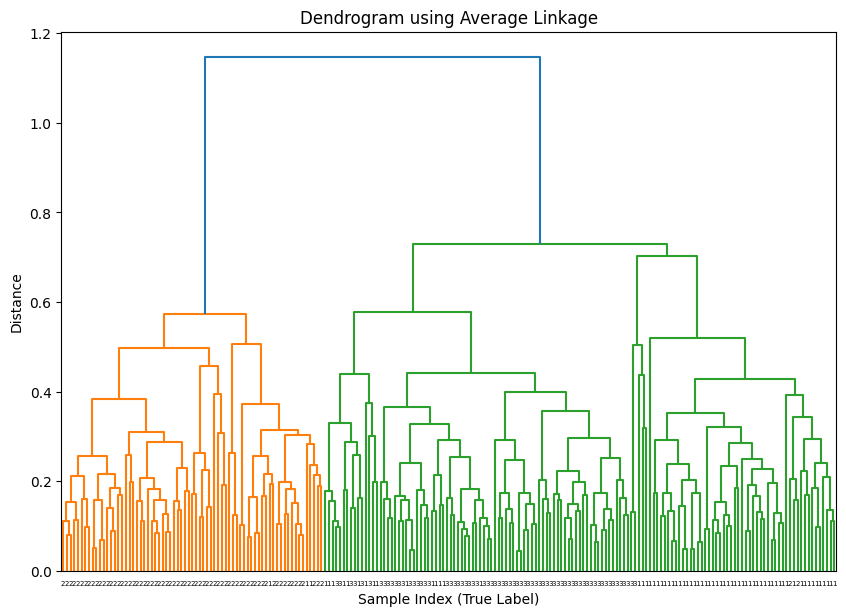

In [63]:
# Try different linkage options
# 3.average
linkage_option = "average"
model = AgglomerativeClustering(
    n_clusters=true_labels.nunique(), linkage=linkage_option
)
predicted_clusters = model.fit_predict(normalized_features)
accuracy = accuracy_score(
    true_labels, np.choose(predicted_clusters, np.unique(true_labels))
)
print(f"Linkage: {linkage_option}, Accuracy: {accuracy}")

Z = linkage(normalized_features, method=linkage_option)

plt.figure(figsize=(10, 7))
dendrogram(Z, labels=true_labels.to_numpy(), leaf_rotation=0)
plt.title(f"Dendrogram using {linkage_option.capitalize()} Linkage")
plt.xlabel("Sample Index (True Label)")
plt.ylabel("Distance")
plt.savefig("prob5.svg")
plt.show()

Linkage: single, Accuracy: 0.3238095238095238


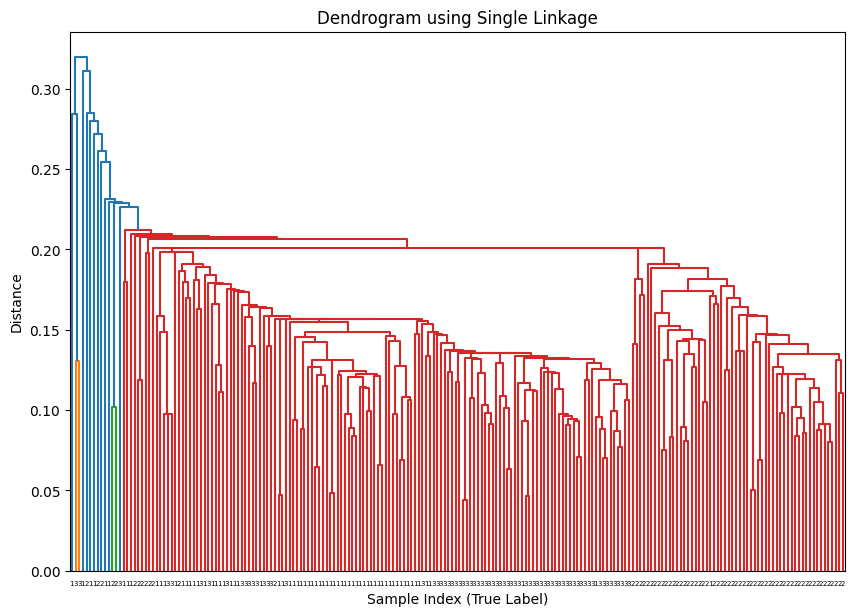

In [62]:
# Try different linkage options
# 4.single
linkage_option = "single"
model = AgglomerativeClustering(
    n_clusters=true_labels.nunique(), linkage=linkage_option
)
predicted_clusters = model.fit_predict(normalized_features)
accuracy = accuracy_score(
    true_labels, np.choose(predicted_clusters, np.unique(true_labels))
)
print(f"Linkage: {linkage_option}, Accuracy: {accuracy}")

Z = linkage(normalized_features, method=linkage_option)

plt.figure(figsize=(10, 7))
dendrogram(Z, labels=true_labels.to_numpy(), leaf_rotation=0)
plt.title(f"Dendrogram using {linkage_option.capitalize()} Linkage")
plt.xlabel("Sample Index (True Label)")
plt.ylabel("Distance")
plt.show()